<a href="https://colab.research.google.com/github/SmarakPradhan/DDPG/blob/main/CircularAgent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
class PID(object):
    # initialize stored data
    
    def __init__(self,kp=1.0,ki=0.002, kd=0.1):
        super(PID, self).__init__()

        self.error=0
        self.kp=kp
        self.ki=ki
        self.kd=kd
        self.e_prev=0
        self.e_cum=0 

    def update(self,error,u):
        self.error=error
        error_kp=self.error
        error_kd=self.error-self.e_prev
        error_ki=self.error+self.e_cum

        total_error=(self.kp*error_kp+self.ki*error_ki+self.kd*error_kd)

        u=u-total_error

        self.e_prev=self.error
        self.e_cum=error_ki

        return u
    

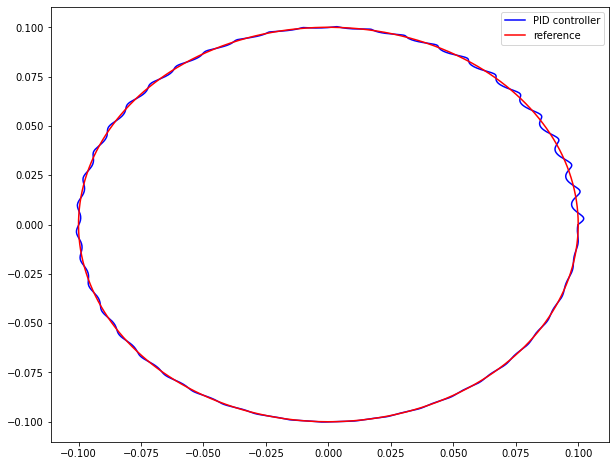

In [11]:
import math
#from PID import PID
import numpy as np
import matplotlib.pyplot as plt
class rotate(object):
    def __init__(self,r=1,w=0.1,dt=0.05):
        super(rotate, self).__init__()
        self.r=r
        self.w=w
        self.t=2*3.14/w
        self.ux=r*w*w
        self.uy=r*w*w
        self.x=self.r*self.w*math.cos(0)
        self.y=self.r*self.w*math.sin(0)
        self.dt=dt

    def get_reward(self):
        x_trajectory = []
        y_trajectory = []
        x_refer = []
        y_refer = []
        
        t=0.0

        error=0.0

        px=PID()
        py=PID()
        
        while(t<self.t):
            self.x+=self.ux*self.dt
            self.y+=self.uy*self.dt
            # print("x: ",self.x," y: ",self.y)
            ux_t=self.r*self.w*math.cos(self.w*t)
            uy_t=self.r*self.w*math.sin(self.w*t)
            # print("x_t: ",ux_t,"x: ",self.x)
            error+=(math.sqrt((self.x-ux_t)**2+(self.y-uy_t)**2))

            self.ux=px.update(self.x-ux_t,self.ux)
            self.uy=py.update(self.y-uy_t,self.uy)

            t+=self.dt
            x_trajectory.append(self.x)
            y_trajectory.append(self.y)
            x_refer.append(ux_t)
            y_refer.append(uy_t)
        reward = 1/(1+error) 
        return x_trajectory,y_trajectory,x_refer,y_refer,error,reward

agent = rotate()
x_trajectory, y_trajectory ,x_refer,y_refer,error,reward = agent.get_reward()
n = len(x_trajectory)
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
ax1.plot(x_trajectory, y_trajectory, 'b', label='PID controller')
ax1.plot(x_refer, y_refer, 'r', label='reference')
plt.legend()






